libraries to import:

In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


loading datasets:


In [7]:
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])


splitting data:

In [10]:
# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Save to CSV for later use
train_data.to_csv("spam_train.csv", index=False)
test_data.to_csv("spam_test.csv", index=False)

# Check the shapes
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (4457, 2)
Test shape: (1115, 2)


encode labels:

In [11]:
# Initialize encoder
encoder = LabelEncoder()

# Fit on training labels and transform
y_train = encoder.fit_transform(train_data['label'])
y_test = encoder.transform(test_data['label'])

# Check the first 10 labels
print(y_train[:10])

[0 0 0 0 0 0 0 0 0 1]


tokenizing the messages:


In [12]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['message'])  # learn word-to-index mapping

# Convert text to sequences of numbers
X_train_seq = tokenizer.texts_to_sequences(train_data['message'])
X_test_seq = tokenizer.texts_to_sequences(test_data['message'])

# Pad sequences so all have the same length
max_len = 100  # maximum words per message
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Preview first 2 sequences
print(X_train_pad[:2])

[[  72   33    4  339  670    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  31    2  101   59   45   21 3836  411 3837   34 3838 3839   38 3840
  3841  101 3842 3843 3844    7   41 3845 3846  461 3847   42 1984    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

building the neural network:

In [14]:
# intialize the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(max_len,)),  # first hidden layer
    Dropout(0.2),                                           # dropout to avoid overfitting
    Dense(64, activation='relu'),                           # second hidden layer
    Dense(1, activation='sigmoid')                          # output layer (probability)
])

# Compile the model
model.compile(
    loss='binary_crossentropy',  # suitable for binary classification
    optimizer='adam',            # Adam optimizer is efficient and popular
    metrics=['accuracy']         # track accuracy during training
)

# Check the model summary
model.summary()

c:\Users\9440\.vscode\fcc_ml_sms_classifier\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,249 (83.00 KB)

 Trainable params: 21,249 (83.00 KB)

 Non-trainable params: 0 (0.00 B)

training the model:

In [15]:
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs=10,           # number of times the model sees the entire dataset
    batch_size=32,       # number of samples per update
    validation_split=0.2 # 20% of training data used for validation
)


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8252 - loss: 25.4416 - val_accuracy: 0.8386 - val_loss: 11.3107
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8410 - loss: 12.8965 - val_accuracy: 0.8632 - val_loss: 9.1382
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8530 - loss: 9.7631 - val_accuracy: 0.8621 - val_loss: 6.8371
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8634 - loss: 6.5096 - val_accuracy: 0.8599 - val_loss: 6.5835
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8746 - loss: 5.3108 - val_accuracy: 0.8442 - val_loss: 5.6090
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8682 - loss: 4.7965 - val_accuracy: 0.8565 - val_loss: 4.8178
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8797 - loss: 3.8132 - val_accuracy: 0.8632 - val_loss: 4.9635
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8856 - loss: 3.1717 - val_accuracy:

some plots for better understanding:

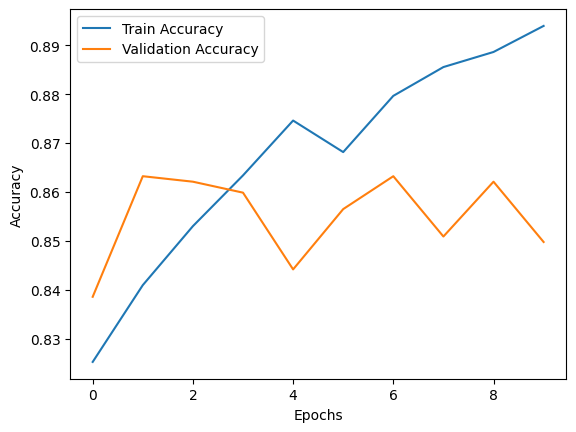

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

helper function: predict_message


In [17]:
import numpy as np

def predict_message(message):
    """
    Predict whether an SMS message is 'ham' or 'spam'.

    Args:
        message (str): The SMS message text.

    Returns:
        list: [probability_of_spam (0-1), 'ham' or 'spam']
    """
    # Convert message to sequence
    seq = tokenizer.texts_to_sequences([message])
    
    # Pad the sequence
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    
    # Predict probability
    prob = model.predict(padded)[0][0]
    
    # Determine label
    label = 'spam' if prob >= 0.5 else 'ham'
    
    return [prob, label]

# Test the function
predict_message("Congratulations! You won a free ticket!")  # Example
predict_message("Hey, are we still meeting tonight?")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[np.float32(4.677662e-05), 'ham']

evaluate model on test data :

In [18]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
df.head()

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8700 - loss: 3.4394
Test Accuracy: 87.00%


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
